In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 1000일 분량의 임의 시간값
dates = pd.date_range(start='2023-08-17', periods=1000, freq='D')
values = np.random.randn(1000)

# 임의 시계열 데이터
data = pd.DataFrame({
    'Date': dates,
    'Value': values
})

data.to_csv('sample_time_data.csv', index=False)

# csv 읽기 : Date 칼럼은 미리 날짜값으로 인지해서 읽도록 지정
data = pd.read_csv('sample_time_data.csv', parse_dates=['Date'])
print(data)

          Date     Value
0   2023-08-17  0.267224
1   2023-08-18 -0.661894
2   2023-08-19 -1.200735
3   2023-08-20 -1.811270
4   2023-08-21  2.114100
..         ...       ...
995 2026-05-08  0.508284
996 2026-05-09  1.146067
997 2026-05-10  0.343980
998 2026-05-11 -0.109778
999 2026-05-12  1.812307

[1000 rows x 2 columns]


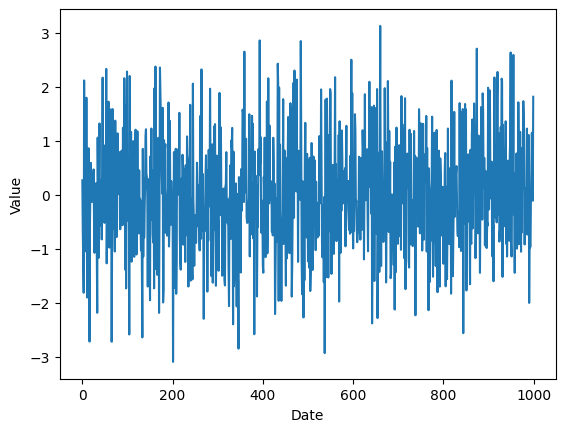

In [8]:
# x축 : 시간값 (Date 칼럼, index_col로 지정했으므로 index로 호출)
plt.plot(data.index,data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

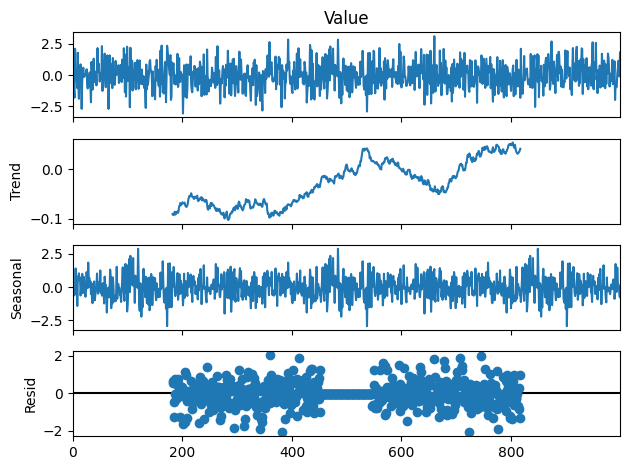

In [9]:
# 계절성 분해를 통한 추세 분석
result = seasonal_decompose(data['Value'], period=365)
result.plot()
plt.show()

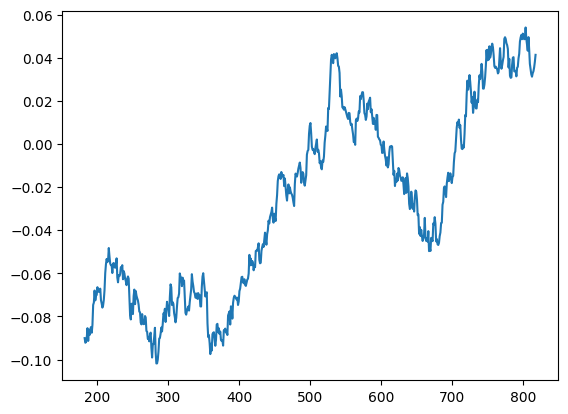

In [10]:
time_domain_trend = result.trend
plt.figure()
plt.plot(time_domain_trend)

<Figure size 640x480 with 0 Axes>

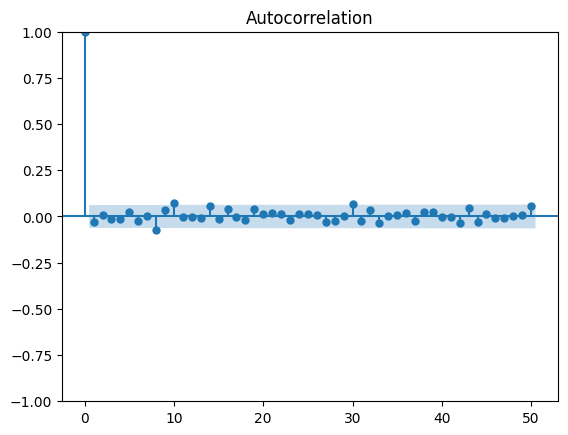

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure()
plot_acf(data['Value'], lags=50)
plt.show()